In [1]:
import networkx as nx
import numpy as np
import grakel as gk # graph kernels module
import matplotlib.pyplot as plt
import matplotlib
import scipy
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
import math
from tqdm import tqdm # Estimation of loop time
from datetime import datetime
import os, sys


In [18]:
# wl_oa_10samples_p05_v2
# wl_oa_10samples_p05
df = pd.read_pickle("../data/binomial/wl_oa_10samples_p05.pkl")
df.head(10)
# df.columns

,B,H0_true,N,alpha,kernel,m,n,nr_nodes_1,nr_nodes_2,p_edge_1,...,power_avg_neigh_degree,power_distfree_b,power_distfree_u,power_max_degree,power_permutation_b,power_permutation_u,power_transitivity,ratio,run_time,timestap
0,500.0,1.0,500.0,0.025,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.024,0.0,0.0,0.164,0.024,0.024,0.018,1.0,0:00:27.686642,2021-04-20 18:35:38.537687
1,500.0,1.0,500.0,0.050,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.038,0.0,0.0,0.220,0.038,0.038,0.034,1.0,0:00:27.692626,2021-04-20 18:35:38.537687
2,500.0,1.0,500.0,0.075,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.064,0.0,0.0,0.298,0.062,0.060,0.052,1.0,0:00:27.696615,2021-04-20 18:35:38.537687
3,500.0,1.0,500.0,0.100,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.088,0.0,0.0,0.378,0.084,0.084,0.064,1.0,0:00:27.701602,2021-04-20 18:35:38.537687
4,500.0,1.0,500.0,0.125,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.112,0.0,0.0,0.402,0.108,0.110,0.094,1.0,0:00:27.706589,2021-04-20 18:35:38.537687
5,500.0,1.0,500.0,0.150,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.136,0.0,0.0,0.418,0.142,0.142,0.124,1.0,0:00:27.710578,2021-04-20 18:35:38.537687
6,500.0,1.0,500.0,0.175,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.162,0.0,0.0,0.482,0.170,0.170,0.154,1.0,0:00:27.715565,2021-04-20 18:35:38.537687
7,500.0,1.0,500.0,0.200,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.194,0.0,0.0,0.564,0.184,0.184,0.172,1.0,0:00:27.720071,2021-04-20 18:35:38.537687
8,500.0,1.0,500.0,0.225,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.222,0.0,0.0,0.600,0.210,0.210,0.208,1.0,0:00:27.724564,2021-04-20 18:35:38.537687
9,500.0,1.0,500.0,0.250,"[{'name': 'WL-OA', 'n_iter': 3}]",10.0,10.0,50.0,50.0,0.05,...,0.244,0.0,0.0,0.610,0.232,0.232,0.242,1.0,0:00:27.729551,2021-04-20 18:35:38.537687


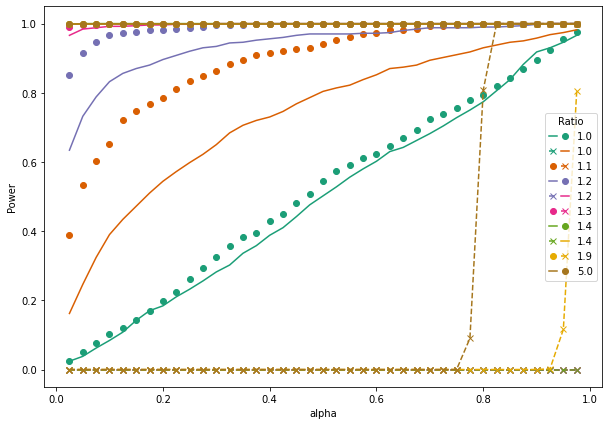

In [26]:
from matplotlib.cm import get_cmap

name = "Dark2"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
fig, ax = plt.subplots(figsize = (10,7))

for cnt, i in enumerate(np.unique(df['ratio'])):
    ax.plot(df['alpha'].loc[(df['ratio'] == i)], df['power_permutation_b'].loc[(df['ratio'] == i)], color = colors[cnt], linestyle = '-', label=str(i))
    ax.plot(df['alpha'].loc[(df['ratio'] == i)], df['power_avg_degree'].loc[(df['ratio'] == i)], color =colors[cnt], linestyle = '', marker = 'o', label=str(i))
    ax.plot(df['alpha'].loc[(df['ratio'] == i)], df['power_distfree_b'].loc[(df['ratio'] == i)], color =colors[cnt], linestyle = '-', marker = 'x', label=str(i))
    #ax.plot(1-df['alpha'].loc[(df['ratio'] == i)], 1-df['power_transitivity'].loc[(df['ratio'] == i)], color =colors[cnt], linestyle = '', marker = 'x', label=str(i))
# lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_u'].loc[(df['p_edge_1'] == p)], 'x', label='rejections_u')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_b'].loc[(df['p_edge_1'] == p)], '*', label='rejections_statistic_b')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_u'].loc[(df['p_edge_1'] == p)], '+', label='rejections_statistic_u')


#ax.legend(title = 'Ratio')
h, l = ax.get_legend_handles_labels()
ax.legend(handles=zip(h[::3], h[1::3], h[2::3]), labels=l[::3], 
           handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'Ratio')
#legend1 = plt.legend([i for i in np.unique(df['ratio'])], loc=1,)
#legend2 = pyplot.legend([lines[i] for i in [0,3,6]], parameters, loc=4)
# ax.add_artist(legend1)
#ax.add_artist(legend2)

ax.set_xlabel('alpha')
ax.set_ylabel('Power')
plt.show()